# Matthew first analysis
In order to become familiar with our analysis object, we would like to first have a glance of its track.

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.basemap import Basemap

### Prepare the map
First we need to have a map to plot the track of Matthew.

/usr/local/Cellar/python/2.7.12_2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


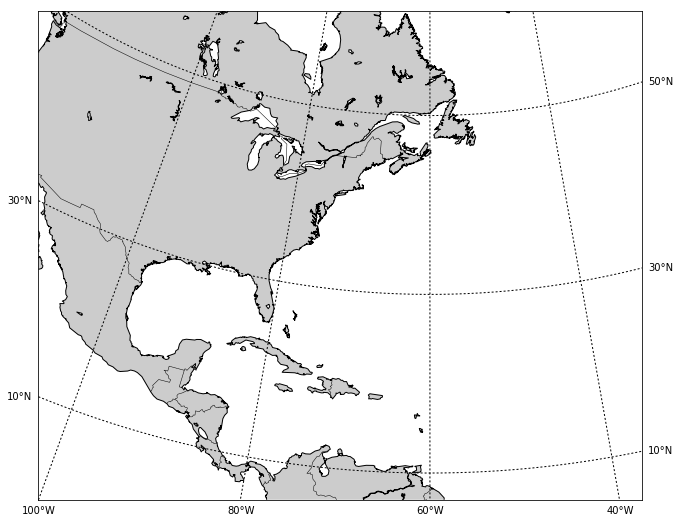

In [2]:
fig = plt.figure(figsize=(15,9))
axes = fig.add_subplot(1, 1, 1)
mapping = Basemap(llcrnrlon=-100.0, llcrnrlat=0.0, urcrnrlon=-20.0, urcrnrlat=57.0,
                  projection='lcc', lat_1=20.0, lat_2=40.0, lon_0=-60.0,
                  resolution ='l', area_thresh=1000.0)

mapping.drawcoastlines()
mapping.drawcountries()
mapping.fillcontinents()
mapping.drawparallels(numpy.arange(10,70,20), labels=[1,1,0,0])
mapping.drawmeridians(numpy.arange(-100,0,20), labels=[0,0,0,1])
plt.show()

### Feed the best track data
Since we want to have a holistic view of the track of Matthew, we would like to use the best track data, which is the "best" data as suggested by its name.

In [3]:
hurricane = {}
# current_name = None
# num_hurricane = numpy.zeros(2, dtype=int)
cache = [[], [], [], [], [], [], [], [], []]

with open("matthewBestTrack.txt", 'r') as hurdat_data:
    for line in hurdat_data:
        split_data = line.split()
        year = int(split_data[0])
        month = int(split_data[1])
        day = int(split_data[2])
        hour = int(split_data[3])
        name = split_data[4]
        lat = float(split_data[5])
        lon = float(split_data[6])
        wind_speed = float(split_data[7])
        pressure = float(split_data[8])
        
        # Categorize different stages of Matthew (wind speed in knots)
        if wind_speed >= 64 and wind_speed < 83:
            category = 1
        elif wind_speed >= 83 and wind_speed < 96:
            category = 2
        elif wind_speed >= 96 and wind_speed < 113:
            category = 3
        elif wind_speed >= 113 and wind_speed < 135:
            category = 4
        elif wind_speed >= 135:
            category = 5
        else:
            category = 0
    
        # Load data
        cache[0].append(year)
        cache[1].append(month)
        cache[2].append(day)
        cache[3].append(hour)
        cache[4].append(lat)
        cache[5].append(lon)
        cache[6].append(wind_speed)
        cache[7].append(pressure)
        cache[8].append(category)

    hurricane = {'year':cache[0][:], 
                 'month':cache[1][:], 
                 'day':cache[2][:], 
                 'hour':cache[3][:], 
                 'latitude':cache[4][:], 
                 'longitude':cache[5][:], 
                 'wind speed':cache[6][:], 
                 'pressure':cache[7][:], 
                 'category':cache[8][:]}

### Plot the track

/usr/local/Cellar/python/2.7.12_2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/Cellar/python/2.7.12_2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


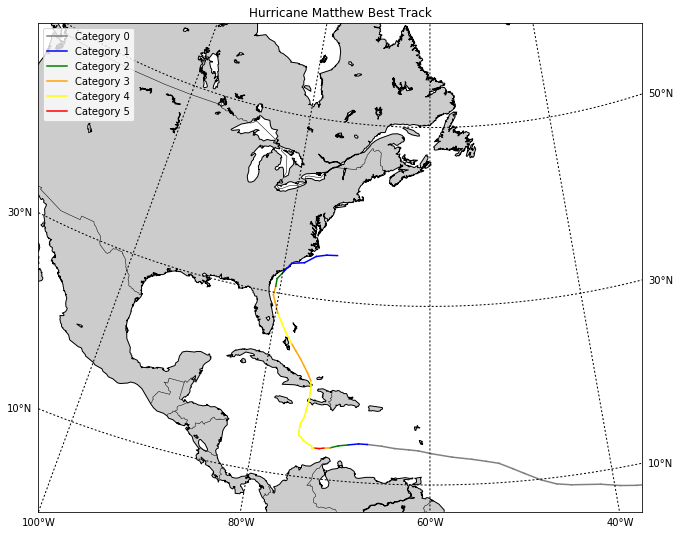

In [4]:
category_color = {5:'red', 4:'yellow', 3:'orange', 2:'green', 1:'blue', 0:'gray'}
fig = plt.figure(figsize=(15,9))
axes = fig.add_subplot(1, 1, 1)

mapping = Basemap(llcrnrlon=-100.0, llcrnrlat=0.0, urcrnrlon=-20.0, urcrnrlat=57.0,
                  projection='lcc', lat_1=20.0, lat_2=40.0, lon_0=-60.0,
                  resolution ='l', area_thresh=1000.0)


longitude, latitude = mapping(hurricane['longitude'], hurricane['latitude'])
for i in xrange(len(longitude) - 1):
    color = category_color[hurricane['category'][i]]
    mapping.plot(longitude[i:i+2], latitude[i:i+2], linewidth=1.5, color=color)

mapping.drawcoastlines()
mapping.drawcountries()
mapping.fillcontinents()
mapping.drawparallels(numpy.arange(10,70,20), labels=[1,1,0,0])
mapping.drawmeridians(numpy.arange(-100,0,20), labels=[0,0,0,1])
axes.set_title('Hurricane Matthew Best Track')
for (category, color) in category_color.iteritems():
    axes.plot([0], [0], color=color, label="Category %s" % category)
axes.legend(loc=2)

plt.show()